
### Implementation of sparse coding and learning with different regularizers
#### Regularizers: ISTA, Hard thresholding, $\lambda_{1/2}$ thresholding, and CEL0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import utils
from generativeModels import SparseModel, runModelSim


### Functions used for plotting

In [2]:
#gets the Phis from the model and draws them in 2-d numUnitsXnumUnits
def plotReceptiveFields(Phi, numUnits, sz):

    # Plot Receptive fields
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    columns = int(np.floor(numUnits/25))
    fig = plt.figure(figsize=(columns,columns))
    rows = int(np.floor(numUnits/columns))
    for i in range(numUnits):
        plt.subplot(rows, columns, i+1)
        plt.imshow(np.reshape(Phi[:, i], (sz, sz)), cmap="gray")
        plt.axis("off")

    fig.suptitle("Receptive fields", fontsize=20)
    plt.subplots_adjust(top=0.9)
    #plt.show()


In [3]:
#Plots the error as a function of iterations
def plotError(errorList, color = 'r' ):

    # Plot error
    plt.figure(figsize=(5, 3))
    plt.ylabel("Error")
    plt.xlabel("Iterations")
    plt.plot(np.arange(len(errorList)), np.array(errorList),color = color)
    plt.tight_layout()
    plt.show() 

## Generative model with thresholding function

#### This implementation of the generative models uses a learning model where the learning rates decay with iterations based on a time-based decay schedule, with decay rates for both learning rates being their initial values divided by 50. We used this implementation for CEL0 for dictionary sizes greater than 500 units. For the other methods the learning rates were the same across iterations. If you want to run the later implementation set the vectors `lr_rV` and `lrPhiV` in `generativeModels.py` to fixed values

#### Define the network implemented above as a model. Also, initialize the constants used in the simulation.

#### *Change the variable `flagMethod` depending on what thresholding function you want to use: `soft`,`hard1`,`half`, or `CEL0` 
#### Change the variable `numUnits` depending on how many units ($\phi$ vectors) you wish to have

#### `batchSize` indicates the number of input patches that are processed at once to produce (for them) sparse codes and at the end adjust the $\phi$ vectors (do the learning)

#### `numIter` indicates the number of different batches you use. `numRSeqs = numIter*batchSize` is the number of input image patches we need 

In [4]:
fileLoad = 'data/DoGPatchesScaleShift.pckl'
#Get the whitened cropped imagess that we are going to use for all algorithms
inputsAll = utils.loadVar(fileLoad)

# Simulation constants
numIter = 4000 # number of iterations
batchSize = 250 # Batch size
numCrImages = numIter*batchSize
sz = 16 # image patch size
numRSeqs = numCrImages

activNum = 0
print(f'size of the input images used for training are {inputsAll.shape}')

size of the input images used for training are (1000000, 256)


In [5]:
flagMethod = 'CEL0' #flagMethod = 'hard1';flagMethod = 'half';flagMethod = 'soft'

####WE CHANGE THESE WITH DIFFERENT NUMOFUNITS, AT LEAST THE LAMDA ALL AND NUMUNITSALL
lr_Phi=5e-3; lr_r = 0.05; lmda = 0.27 
numUnits = 1000

print(f'We use the {flagMethod} algorithm')
print(f'num units are  {numUnits},batch size is {batchSize}, lmda {lmda},lr_r {lr_r},lr_Phi {lr_Phi}')

#the starting r sequences are all zeros
rIn = np.zeros((numRSeqs,numUnits))    

# Define and run the model
model = SparseModel(sz**2,numUnits,batchSize,lmda,flagMethod,lr_r = lr_r,lr_Phi = lr_Phi)
Phi,rActivityFreqUnit, rNumActiveInstances, errorRates= runModelSim(model,numIter,batchSize,inputsAll,rIn)

    
#save the results of the simulation
fileSave = 'data/'+flagMethod+str(numUnits)+'units.pckl'
utils.saveVar((Phi,rActivityFreqUnit,rNumActiveInstances,errorRates,lmda,numUnits),fileSave)




We use the CEL0 algorithm
num units are  1000,batch size is 250, lmda 0.27,lr_r 0.05,lr_Phi 0.005


  0%|          | 0/4000 [00:00<?, ?it/s]

iter: 100/4000, Moving error: 0.02653730951245446
iter: 200/4000, Moving error: 0.01943574449659959
iter: 300/4000, Moving error: 0.017786485551490958
iter: 400/4000, Moving error: 0.016829001273050866
iter: 500/4000, Moving error: 0.016464394898991385
iter: 600/4000, Moving error: 0.015987178737428078
iter: 700/4000, Moving error: 0.015595148301592542
iter: 800/4000, Moving error: 0.015347388402388723
iter: 900/4000, Moving error: 0.015398283272846536
iter: 1000/4000, Moving error: 0.015072047028688633
iter: 1100/4000, Moving error: 0.014989270694127015
iter: 1200/4000, Moving error: 0.014838277921373778
iter: 1300/4000, Moving error: 0.01473453595485189
iter: 1400/4000, Moving error: 0.014608951176715452
iter: 1500/4000, Moving error: 0.014554541888834491
iter: 1600/4000, Moving error: 0.014599745409924342
iter: 1700/4000, Moving error: 0.014521258173420416
iter: 1800/4000, Moving error: 0.014483638935332251
iter: 1900/4000, Moving error: 0.01420162074934951
iter: 2000/4000, Moving e

### Drawing loss 


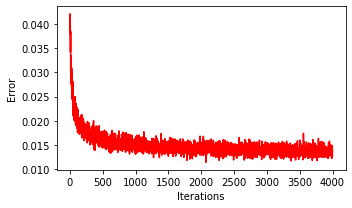

In [6]:
plotError(errorRates)

### Drawing the columns of $\Phi$  (receptive field)


<Figure size 432x288 with 0 Axes>

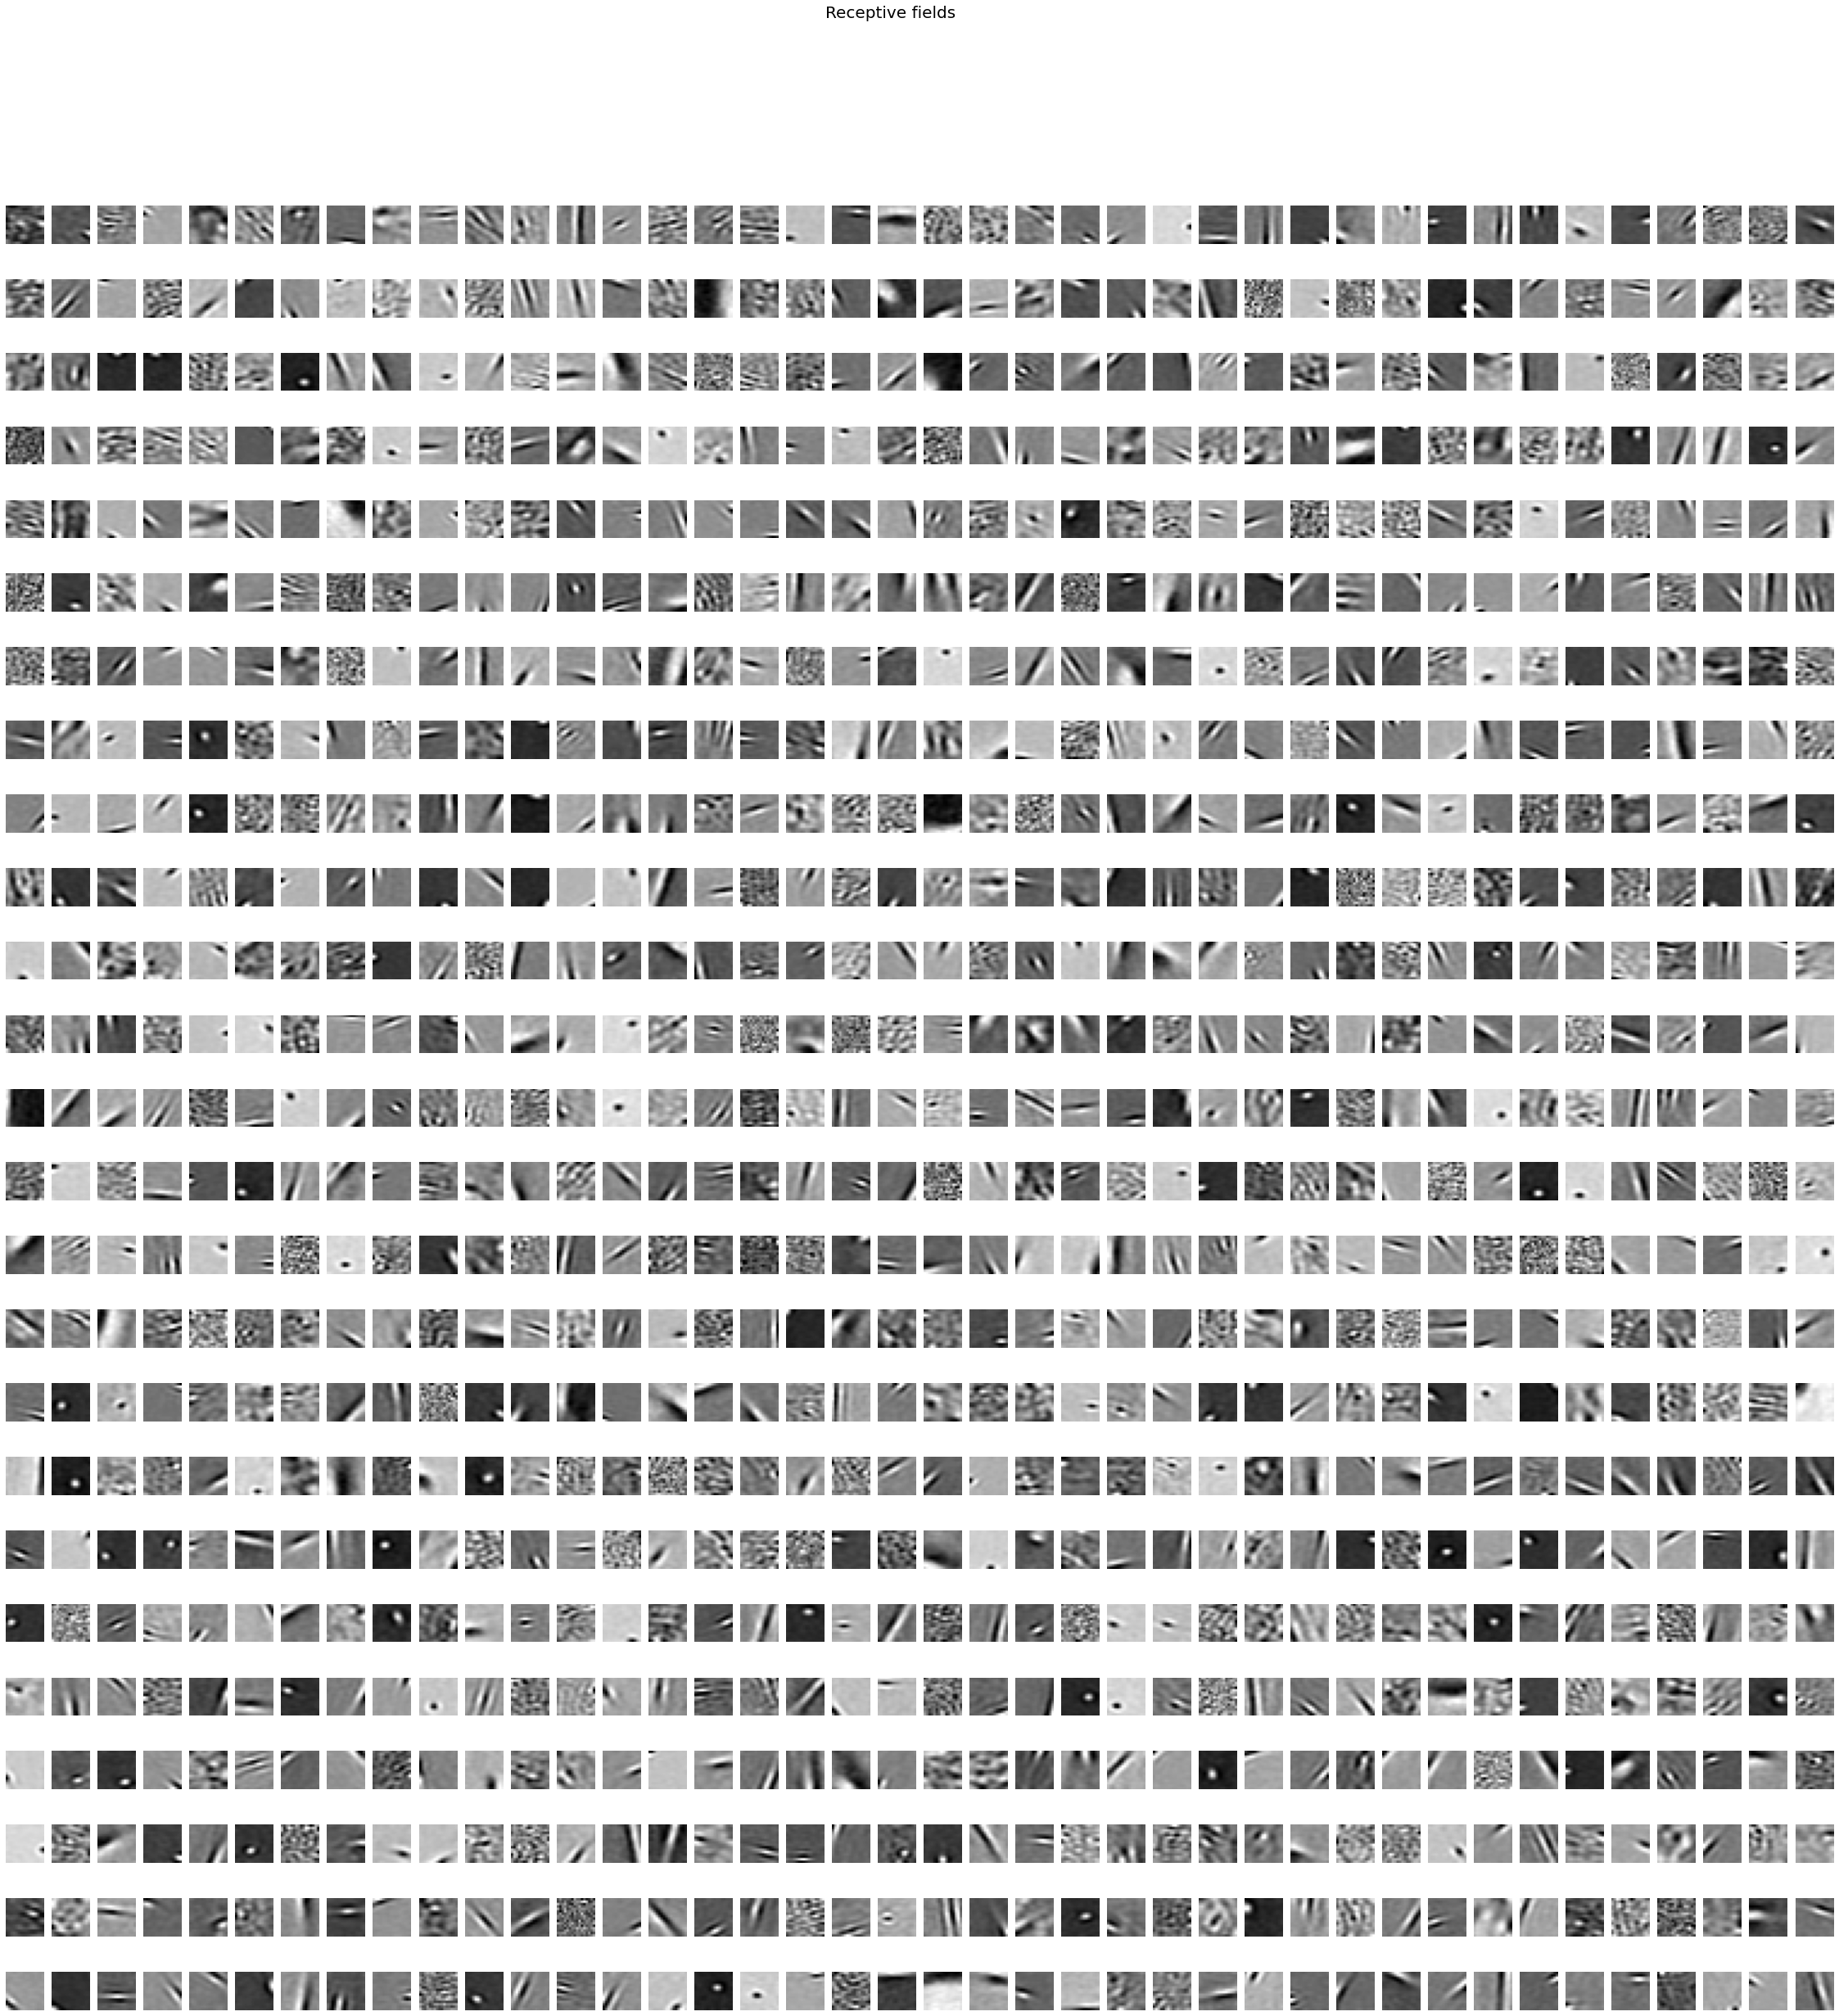

In [7]:
plotReceptiveFields(Phi, numUnits, sz)
